# HOMEWORK 5: TEXT CLASSIFICATION
In this homework, you will create models to classify texts from TRUE call-center. There are two classification tasks:
1. Action Classification: Identify which action the customer would like to take (e.g. enquire, report, cancle)
2. Object Classification: Identify which object the customer is referring to (e.g. payment, truemoney, internet, roaming) 

In this homework, you are asked to do the following tasks:
1. Data Cleaning
2. Preprocessing data for keras
3. Build and evaluate a model for "action" classification
4. Build and evaluate a model for "object" classification
5. Build and evaluate a multi-task model that does both "action" and "object" classifications in one-go 


Note: we have removed phone numbers from the dataset for privacy purposes. 

In [ ]:
!wget --no-check-certificate https://www.dropbox.com/s/37u83g55p19kvrl/clean-phone-data-for-students.csv

--2021-02-28 07:34:13--  https://www.dropbox.com/s/37u83g55p19kvrl/clean-phone-data-for-students.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:601c:18::a27d:612
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/37u83g55p19kvrl/clean-phone-data-for-students.csv [following]
--2021-02-28 07:34:13--  https://www.dropbox.com/s/raw/37u83g55p19kvrl/clean-phone-data-for-students.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc05a0bda36fd7dd27c5011d34bb.dl.dropboxusercontent.com/cd/0/inline/BJy73-7bvzzUXKsKTyjDj73x9Gxn-LLZBwkVZjDe2BP0tK2TyDieoyN-ccc4KPBK2UFkumffEETXa_5l1vf7adkHg4KEw8uN0g0a5g-hpc4X2w/file# [following]
--2021-02-28 07:34:13--  https://uc05a0bda36fd7dd27c5011d34bb.dl.dropboxusercontent.com/cd/0/inline/BJy73-7bvzzUXKsKTyjDj73x9Gxn-LLZBwkVZjDe2BP0tK2TyDieoyN-ccc4KPBK2UFku

## Import Libs

In [ ]:
%matplotlib inline
import pandas
import sklearn
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt

## Loading data
First, we load the data from disk into a Dataframe.

A Dataframe is essentially a table, or 2D-array/Matrix with a name for each column.

In [ ]:
data_df = pandas.read_csv('clean-phone-data-for-students.csv')

Let's preview the data.

In [ ]:
# Show the top 5 rows
display(data_df.head())
# Summarize the data
data_df.describe()

,Sentence Utterance,Action,Object
0,<PHONE_NUMBER_REMOVED> ผมไปจ่ายเงินที่ Counte...,enquire,payment
1,internet ยังความเร็วอยุ่เท่าไหร ครับ,enquire,package
2,ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้...,report,suspend
3,พี่ค่ะยังใช้ internet ไม่ได้เลยค่ะ เป็นเครื่อ...,enquire,internet
4,ฮาโหล คะ พอดีว่าเมื่อวานเปิดซิมทรูมูฟ แต่มันโ...,report,phone_issues


,Sentence Utterance,Action,Object
count,16175,16175,16175
unique,13389,10,33
top,บริการอื่นๆ,enquire,service
freq,97,10377,2525


## Data cleaning

We call the DataFrame.describe() again.
Notice that there are 33 unique labels/classes for object and 10 unique labels for action that the model will try to predict.
But there are unwanted duplications e.g. Idd,idd,lotalty_card,Lotalty_card

Also note that, there are 13389 unqiue sentence utterances from 16175 utterances. You have to clean that too!

## #TODO 1: 
You will have to remove unwanted label duplications as well as duplications in text inputs. 
Also, you will have to trim out unwanted whitespaces from the text inputs. 
This shouldn't be too hard, as you have already seen it in the demo.



In [ ]:
display(data_df.describe())
display(data_df.Object.unique())
display(data_df.Action.unique())

,Sentence Utterance,Action,Object
count,16175,16175,16175
unique,13389,10,33
top,บริการอื่นๆ,enquire,service
freq,97,10377,2525


array(['payment', 'package', 'suspend', 'internet', 'phone_issues',
       'service', 'nonTrueMove', 'balance', 'detail', 'bill', 'credit',
       'promotion', 'mobile_setting', 'iservice', 'roaming', 'truemoney',
       'information', 'lost_stolen', 'balance_minutes', 'idd',
       'TrueMoney', 'garbage', 'Payment', 'IDD', 'ringtone', 'Idd',
       'rate', 'loyalty_card', 'contact', 'officer', 'Balance', 'Service',
       'Loyalty_card'], dtype=object)

array(['enquire', 'report', 'cancel', 'Enquire', 'buy', 'activate',
       'request', 'Report', 'garbage', 'change'], dtype=object)

In [ ]:
# TODO1: Data cleaning
data_df2 = data_df[["Sentence Utterance", "Action", "Object"]]
data_df2.columns = ['input', 'raw_action','raw_object']
data_df2['clean_action']=data_df2['raw_action'].str.lower().copy()
data_df2['clean_object']=data_df2['raw_object'].str.lower().copy()
data_df2.drop('raw_action', axis=1, inplace=True)
data_df2.drop('raw_object', axis=1, inplace=True)
data_df2 = data_df2.drop_duplicates("input", keep="first")
display(data_df2.describe())
display(data_df2.clean_action.unique())
display(data_df2.clean_object.unique())
data = data_df2.to_numpy()
print(data)




,input,clean_action,clean_object
count,13389,13389,13389
unique,13389,8,26
top,สอบถามยอดค่ะ,enquire,service
freq,1,8658,2111


array(['enquire', 'report', 'cancel', 'buy', 'activate', 'request',
       'garbage', 'change'], dtype=object)

array(['payment', 'package', 'suspend', 'internet', 'phone_issues',
       'service', 'nontruemove', 'balance', 'detail', 'bill', 'credit',
       'promotion', 'mobile_setting', 'iservice', 'roaming', 'truemoney',
       'information', 'lost_stolen', 'balance_minutes', 'idd', 'garbage',
       'ringtone', 'rate', 'loyalty_card', 'contact', 'officer'],
      dtype=object)

[[' <PHONE_NUMBER_REMOVED> ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต 3276.25 บาท เมื่อวานที่ผมเช็คที่ศูนย์บอกมียอด 3057.79 บาท'
  'enquire' 'payment']
 [' internet ยังความเร็วอยุ่เท่าไหร ครับ' 'enquire' 'package']
 [' ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้ ค่ะ' 'report' 'suspend']
 ...
 ['ยอดเงินเหลือเท่าไหร่ค่ะ' 'enquire' 'balance']
 ['ยอดเงินในระบบ' 'enquire' 'balance']
 ['สอบถามโปรโมชั่นปัจจุบันที่ใช้อยู่ค่ะ' 'enquire' 'package']]


In [ ]:
unique_action = data_df2.clean_action.unique()

action_2_num_map = dict(zip(unique_action, range(len(unique_action))))
num_2_action_map = dict(zip(range(len(unique_action)), unique_action))

print("Create Mappings")
display(num_2_action_map)
display(action_2_num_map)

print("Before Mappings")
display(data[:, 1])
data[:,1] = np.vectorize(action_2_num_map.get)(data[:,1])

print("After Mappings")
display(data[:, 1])

Create Mappings


{0: 'enquire',
 1: 'report',
 2: 'cancel',
 3: 'buy',
 4: 'activate',
 5: 'request',
 6: 'garbage',
 7: 'change'}

{'activate': 4,
 'buy': 3,
 'cancel': 2,
 'change': 7,
 'enquire': 0,
 'garbage': 6,
 'report': 1,
 'request': 5}

Before Mappings


array(['enquire', 'enquire', 'report', ..., 'enquire', 'enquire',
       'enquire'], dtype=object)

After Mappings


array([0, 0, 1, ..., 0, 0, 0], dtype=object)

In [ ]:
unique_object = data_df2.clean_object.unique()

object_2_num_map = dict(zip(unique_object, range(len(unique_object))))
num_2_object_map = dict(zip(range(len(unique_object)), unique_object))

print("Create Mappings")
display(num_2_object_map)
display(object_2_num_map)

print("Before Mappings")
display(data[:, 2])
data[:,2] = np.vectorize(object_2_num_map.get)(data[:,2])

print("After Mappings")
display(data[:, 2])

Create Mappings


{0: 'payment',
 1: 'package',
 2: 'suspend',
 3: 'internet',
 4: 'phone_issues',
 5: 'service',
 6: 'nontruemove',
 7: 'balance',
 8: 'detail',
 9: 'bill',
 10: 'credit',
 11: 'promotion',
 12: 'mobile_setting',
 13: 'iservice',
 14: 'roaming',
 15: 'truemoney',
 16: 'information',
 17: 'lost_stolen',
 18: 'balance_minutes',
 19: 'idd',
 20: 'garbage',
 21: 'ringtone',
 22: 'rate',
 23: 'loyalty_card',
 24: 'contact',
 25: 'officer'}

{'balance': 7,
 'balance_minutes': 18,
 'bill': 9,
 'contact': 24,
 'credit': 10,
 'detail': 8,
 'garbage': 20,
 'idd': 19,
 'information': 16,
 'internet': 3,
 'iservice': 13,
 'lost_stolen': 17,
 'loyalty_card': 23,
 'mobile_setting': 12,
 'nontruemove': 6,
 'officer': 25,
 'package': 1,
 'payment': 0,
 'phone_issues': 4,
 'promotion': 11,
 'rate': 22,
 'ringtone': 21,
 'roaming': 14,
 'service': 5,
 'suspend': 2,
 'truemoney': 15}

Before Mappings


array(['payment', 'package', 'suspend', ..., 'balance', 'balance',
       'package'], dtype=object)

After Mappings


array([0, 1, 2, ..., 7, 7, 1], dtype=object)

Before
[[' <PHONE_NUMBER_REMOVED> ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต 3276.25 บาท เมื่อวานที่ผมเช็คที่ศูนย์บอกมียอด 3057.79 บาท'
  0 0]
 [' internet ยังความเร็วอยุ่เท่าไหร ครับ' 0 1]
 [' ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้ ค่ะ' 1 2]
 ...
 ['ยอดเงินเหลือเท่าไหร่ค่ะ' 0 7]
 ['ยอดเงินในระบบ' 0 7]
 ['สอบถามโปรโมชั่นปัจจุบันที่ใช้อยู่ค่ะ' 0 1]]
After
[['<PHONE_NUMBER_REMOVED> ผมไปจ่ายเงินที่ Counter Services เค้าเช็ต 3276.25 บาท เมื่อวานที่ผมเช็คที่ศูนย์บอกมียอด 3057.79 บาท'
  0 0]
 ['internet ยังความเร็วอยุ่เท่าไหร ครับ' 0 1]
 ['ตะกี้ไปชำระค่าบริการไปแล้ว แต่ยังใช้งานไม่ได้ ค่ะ' 1 2]
 ...
 ['ยอดเงินเหลือเท่าไหร่ค่ะ' 0 7]
 ['ยอดเงินในระบบ' 0 7]
 ['สอบถามโปรโมชั่นปัจจุบันที่ใช้อยู่ค่ะ' 0 1]]


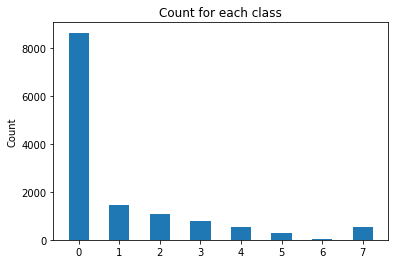

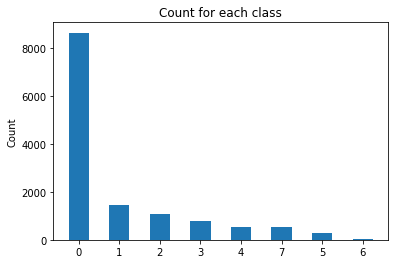

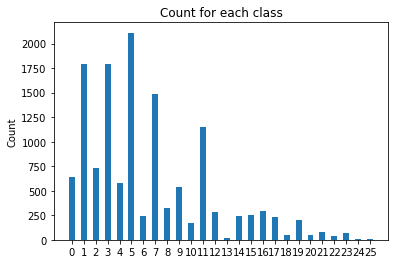

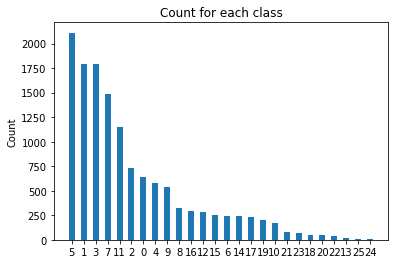

In [ ]:
def strip_str(string):
    return string.strip()
     
# Trim of extra begining and trailing whitespace in the string
print("Before")
print(data)
data[:,0] = np.vectorize(strip_str)(data[:,0])
print("After")
print(data)

def plot(label, count):
    fig, ax = plt.subplots()
    ind = np.arange(len(count))
    rects1 = ax.bar(ind, count, 0.5)

    ax.set_ylabel('Count')
    ax.set_title('Count for each class')
    ax.set_xticks(ind)
    ax.set_xticklabels(label)

    plt.show()
    
label, count = np.unique(data[:, 1], return_counts=True)
plot(label, count)

# pack the label and count together
bundle = list(zip(label, count))
# sort them by count
bundle = sorted(bundle, key=lambda e: e[1], reverse=True) 
# unpack the values
label, count = zip(*bundle)
plot(label, count)

label, count = np.unique(data[:, 2], return_counts=True)
plot(label, count)

# pack the label and count together
bundle = list(zip(label, count))
# sort them by count
bundle = sorted(bundle, key=lambda e: e[1], reverse=True) 
# unpack the values
label, count = zip(*bundle)
plot(label, count)

## #TODO 2: Preprocessing data for Keras
You will be using Tensorflow 2 keras in this assignment. Please show us how you prepare your data for keras.
Don't forget to split data into train and test sets (+ validation set if you want)

In [ ]:
# TODO2: Preprocessing data for Keras
!pip install pythainlp
!pip install marisa_trie
!pip install pythainlp[deepcut,icu]
!pip install sklearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut

     |████████████████████████████████| 10.6MB 18.4MB/s 
     |████████████████████████████████| 747kB 44.3MB/s 
     |████████████████████████████████| 276kB 15.8MB/s 
  Created wheel for marisa-trie: filename=marisa_trie-0.7.5-cp37-cp37m-linux_x86_64.whl size=861508 sha256=fd5b7a54176b9223c8189261fdf654f7dafef080ca895bf5016be991c51d8e31
  Stored in directory: /root/.cache/pip/wheels/45/24/79/022624fc914f0e559fe8a1141aaff1f9df810905a13fc75d57
Successfully built marisa-trie
     |████████████████████████████████| 235kB 18.4MB/s 
  Created wheel for pyicu: filename=PyICU-2.6-cp37-cp37m-linux_x86_64.whl size=1306436 sha256=036ce94c1f399f0dd0614c52d6f9c2a5b8672b3cf87f91bb171b2ebf42595eeb
  Stored in directory: /root/.cache/pip/wheels/31/21/2f/1c91831e8a93537ab21f6b4b935781b681104635fdb0315791
Successfully built pyicu
     |████████████████████████████████| 2.0MB 18.1MB/s 
     |████████████████████████████████| 1.3MB 17.4MB/s 
     |████████████████████████████████| 481kB 47.1MB/s 
     |

In [ ]:
def num_2_onehot(value,number_list):
  one_hot = [0. for e in range(len(number_list))]
  one_hot[value]=1.
  return np.array(one_hot)

In [ ]:
from pythainlp.corpus.common import thai_words
from pythainlp.tokenize import word_tokenize
from marisa_trie import Trie


thai_dict = set(thai_words())
thai_dict.add('<PHONE_NUMBER_REMOVED>')
trie = Trie(thai_dict)

word_2_num_map = dict(zip(thai_dict, range(1,len(thai_dict)+1)))
num_2_word_map = dict(zip(range(1,len(thai_dict)+1), thai_dict))

word_2_num_map["</PAD>"]=0
num_2_word_map[0] = "</PAD>"

word_2_num_map["UNK"]=len(word_2_num_map)
num_2_word_map[len(num_2_word_map)] = "UNK"

print(num_2_word_map[0])
print(word_2_num_map["UNK"])

slice_sentence=[]
action_sentence=[]
object_sentence=[]
for d in data:
  slice_sentence.append(word_tokenize(d[0],engine="newmm", custom_dict=trie))
  action_sentence.append(num_2_onehot(d[1],num_2_action_map))
  object_sentence.append(num_2_onehot(d[2],num_2_object_map))

print("before")
for i in range(10):
  print(slice_sentence[i],action_sentence[i],object_sentence[i])

max_len = 0
for i in range(len(data)):
  word_2_num_list = []
  for word in slice_sentence[i]:
    if word == " ":
      continue
    if word not in word_2_num_map:
      word_2_num_list.append(word_2_num_map["UNK"])
    else:
      word_2_num_list.append(word_2_num_map[word])
  max_len = max(len(word_2_num_list),max_len)
  slice_sentence[i] = np.array(word_2_num_list)
slice_sentence=np.array(slice_sentence)
action_sentence=np.array(action_sentence)
object_sentence=np.array(object_sentence)
print("after")
for i in range(10): 
  print(slice_sentence[i],action_sentence[i],object_sentence[i])

print(len(data),max_len)    


</PAD>
62145
before
['<PHONE_NUMBER_REMOVED>', ' ', 'ผม', 'ไป', 'จ่าย', 'เงิน', 'ที่', ' ', 'Counter', ' ', 'Services', ' ', 'เค้า', 'เช็ต', ' ', '3276.25', ' ', 'บาท', ' ', 'เมื่อวาน', 'ที่', 'ผม', 'เช็ค', 'ที่', 'ศูนย์', 'บอก', 'มี', 'ยอด', ' ', '3057.79', ' ', 'บาท'] [1. 0. 0. 0. 0. 0. 0. 0.] [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
['internet', ' ', 'ยัง', 'ความเร็ว', 'อยุ่', 'เท่า', 'ไห', 'ร', ' ', 'ครับ'] [1. 0. 0. 0. 0. 0. 0. 0.] [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
['ตะกี้', 'ไป', 'ชำระ', 'ค่าบริการ', 'ไป', 'แล้ว', ' ', 'แต่', 'ยัง', 'ใช้งาน', 'ไม่', 'ได้', ' ', 'ค่ะ'] [0. 1. 0. 0. 0. 0. 0. 0.] [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]
['พี่', 'ค่ะ', 'ยัง', 'ใช้', ' ', 'internet', ' ', 'ไม่', 'ได้', 'เลย', 'ค่ะ', ' ', 'เป็น', 'เครื่อง', ' ', 'โก', 'ลไล'] [1. 0. 0. 0. 0. 0. 0. 0.] [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:46: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
!pip install python-crfsuite
!pip install tensorflow-addons
!pip install tf2crf

ERROR: Operation cancelled by user


In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf

slice_sentence=tf.keras.preprocessing.sequence.pad_sequences(slice_sentence, maxlen=None, dtype='int32', padding='post', truncating='pre', value=0.)
print(slice_sentence[0],slice_sentence.shape)

[46794 19612 47004  9062 49849  1628 62145 62145 56264 62145 62145 45722
 24990  1628 19612   107  1628 41913 12561 37555 28367 62145 45722     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0] (13389, 106)


In [ ]:
devide = len(slice_sentence)//10*7
train_sentence = slice_sentence[:devide]
test_sentence = slice_sentence[devide:]

train_action = action_sentence[:devide]
test_action = action_sentence[devide:]

train_object = object_sentence[:devide]
test_object = object_sentence[devide:]

## #TODO 3: Build and evaluate a model for "action" classification


In [ ]:
#TODO 3: Build and evaluate a model for "action" classification
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense ,Embedding, Bidirectional, Dropout, GlobalMaxPooling1D, GRU
from tensorflow.keras.optimizers import Adam


inputs = Input(shape=(106,), dtype='int32')

x = (Embedding(len(word_2_num_map),128,input_length=106,mask_zero=True))(inputs)
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
out = Dense(len(action_2_num_map), activation='softmax')(x)

model_action = Model(inputs=inputs, outputs=out)
model_action.compile(optimizer=Adam(lr=0.001),  loss='categorical_crossentropy', metrics=['categorical_accuracy'])

model_action.summary()
model_action.fit(train_sentence,train_action, batch_size=64,epochs=10,verbose=1)


Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_36 (InputLayer)        [(None, 106)]             0         
_________________________________________________________________
embedding_34 (Embedding)     (None, 106, 128)          7954688   
_________________________________________________________________
conv1d_53 (Conv1D)           (None, 34, 128)           114816    
_________________________________________________________________
conv1d_54 (Conv1D)           (None, 10, 128)           114816    
_________________________________________________________________
bidirectional_8 (Bidirection (None, 10, 256)           198144    
_________________________________________________________________
global_max_pooling1d_25 (Glo (None, 256)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 128)               328

In [ ]:
def evaluate(x_test, y_test, model):
  y_pred = model.predict(x_test)
  acc=0
  for i in range(len(y_pred)):
    if np.argmax(y_pred[i])==np.argmax(y_test[i]):
      acc+=1
  acc=(acc/len(y_pred))*100
  
  return acc
print("accurency = ",evaluate(test_sentence, test_action, model_action),"%")


accurency =  84.1411881680338 %


## #TODO 4: Build and evaluate a model for "object" classification



In [ ]:
#TODO 4: Build and evaluate a model for "object" classification
inputs = Input(shape=(106,), dtype='int32')

x = (Embedding(len(word_2_num_map),128,input_length=106,mask_zero=True))(inputs)
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)
out = Dense(len(object_2_num_map), activation='softmax')(x)

model_object = Model(inputs=inputs, outputs=out)
model_object.compile(optimizer=Adam(lr=0.001),  loss='categorical_crossentropy', metrics=['categorical_accuracy'])


model_object.summary()
model_object.fit(train_sentence,train_object, batch_size=64,epochs=10,verbose=1)

Model: "model_31"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_37 (InputLayer)        [(None, 106)]             0         
_________________________________________________________________
embedding_35 (Embedding)     (None, 106, 128)          7954688   
_________________________________________________________________
conv1d_55 (Conv1D)           (None, 34, 128)           114816    
_________________________________________________________________
conv1d_56 (Conv1D)           (None, 10, 128)           114816    
_________________________________________________________________
bidirectional_9 (Bidirection (None, 10, 256)           198144    
_________________________________________________________________
global_max_pooling1d_26 (Glo (None, 256)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               328

In [ ]:
print("accurency = ",evaluate(test_sentence, test_object, model_object),"%")

accurency =  61.67039522744221 %


## #TODO 5: Build and evaluate a multi-task model that does both "action" and "object" classifications in one-go 

This can be a bit tricky, if you are not familiar with the Keras functional API. PLEASE READ these webpages(https://www.tensorflow.org/guide/keras/functional, https://keras.io/getting-started/functional-api-guide/) before you start this task.   

Your model will have 2 separate output layers one for action classification task and another for object classification task. 

This is a rough sketch of what your model might look like:
![image](https://raw.githubusercontent.com/ekapolc/nlp_course/master/HW5/multitask_sketch.png)

In [ ]:
#TODO 5: Build and evaluate a multi-task model that does both "action" and "object" classifications in one-go


inputs = Input(shape=(106,), dtype='int32')

x = (Embedding(len(word_2_num_map),128,input_length=106,mask_zero=True))(inputs)
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = Conv1D(128, 7, padding="valid", activation="relu", strides=3)(x)
x = Bidirectional(GRU(128, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)

# We add a vanilla hidden layer:
x = Dense(128, activation="relu")(x)
x = Dropout(0.5)(x)

out_action = Dense(len(action_2_num_map), activation='softmax',name="action")(x)
out_object = Dense(len(object_2_num_map), activation='softmax',name='object')(x)

out=[out_action,out_object]

model_multi_task = Model(inputs=inputs, outputs=out)
model_multi_task.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy',metrics=['categorical_accuracy'])
model_multi_task.summary()

train_multi=[train_action,train_object]

model_multi_task.fit(train_sentence,train_multi, batch_size=64,epochs=10,verbose=1)

Model: "model_34"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_40 (InputLayer)           [(None, 106)]        0                                            
__________________________________________________________________________________________________
embedding_38 (Embedding)        (None, 106, 128)     7954688     input_40[0][0]                   
__________________________________________________________________________________________________
conv1d_61 (Conv1D)              (None, 34, 128)      114816      embedding_38[0][0]               
__________________________________________________________________________________________________
conv1d_62 (Conv1D)              (None, 10, 128)      114816      conv1d_61[0][0]                  
___________________________________________________________________________________________

In [ ]:
action_pred,object_pred = model_multi_task.predict(test_sentence)
acc_a = 0
for i in range(len(action_pred)):
  if np.argmax(action_pred[i])==np.argmax(test_action[i]):
      acc_a+=1
acc_a=(acc_a/len(action_pred))*100

acc_o = 0
for i in range(len(object_pred)):
  if np.argmax(object_pred[i])==np.argmax(test_object[i]):
      acc_o+=1
acc_o=(acc_o/len(object_pred))*100

print("Action: accurency = ",acc_a,"%")
print("Object: accurency = ",acc_o,"%")

Action: accurency =  84.61347253293562 %
Object: accurency =  61.81953765846383 %
